In [19]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy import signal

In [91]:
delta = 1e-4
x = np.arange(-10,10,delta)
pdf = stats.norm.pdf(x)

In [93]:
pmf = pdf*delta
conv_pmf = np.convolute(pmf,pmf,'same')
conv_pdf = conv_pmf/delta

AttributeError: module 'numpy' has no attribute 'convolute'

ValueError: x and y must have same first dimension, but have shapes (2000,) and (3999,)

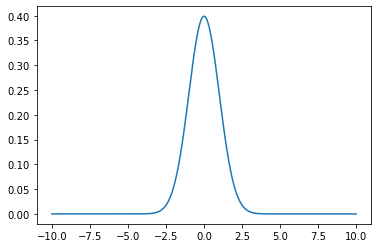

In [82]:
fig, ax = plt.subplots(1, 1)
ax.plot(x,f)
ax.plot(x,conv)

In [78]:
f.shape

(2000,)

In [77]:
conv.shape

(2000,)

In [80]:
a = [1,2,3,4,5]
b = [1,2,3,4,5]

np.convolve(a,b)

array([ 1,  4, 10, 20, 35, 44, 46, 40, 25])

Sum of 1st pmf: 1.0000000000023075
Sum of 2nd pmf: 1.0000000000023075
Sum of convoluted pmf: 1.000000000004626
Integration of convoluted pdf: 1.0000000000023306


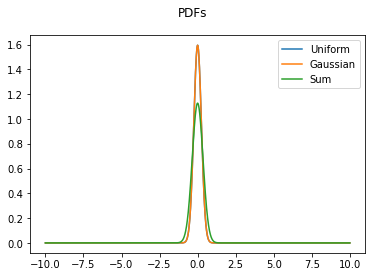

In [88]:
uniform_dist = stats.uniform(loc=0, scale=6)
std = 0.25
normal_dist = stats.norm(loc=0, scale=std)

delta = 1e-4
big_grid = np.arange(-10,10,delta)

pmf1 = normal_dist.pdf(big_grid)*delta
print("Sum of 1st pmf: "+str(sum(pmf1)))

pmf2 = normal_dist.pdf(big_grid)*delta
print("Sum of 2nd pmf: "+str(sum(pmf2)))


conv_pmf = signal.fftconvolve(pmf1,pmf2,'same')
print("Sum of convoluted pmf: "+str(sum(conv_pmf)))

pdf1 = pmf1/delta
pdf2 = pmf2/delta
conv_pdf = conv_pmf/delta
print("Integration of convoluted pdf: " + str(np.trapz(conv_pdf, big_grid)))


plt.plot(big_grid,pdf1, label='Uniform')
plt.plot(big_grid,pdf2, label='Gaussian')
plt.plot(big_grid,conv_pdf, label='Sum')
plt.legend(loc='best'), plt.suptitle('PDFs')
plt.show()

array([ 9.29814324e-17,  7.77459064e-17,  5.95842521e-17, ...,
        3.37550253e-17, -1.82037968e-19,  1.01571119e-16])